# Johnatan Meoño 19000503
# Algoritmos en la ciencia de datos

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from numpy.linalg import inv

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [101]:
from sklearn.metrics import mean_squared_error

# Definiendo los datos

In [6]:
mu, sigma = 0, 1 # mean and standard deviation

In [7]:
x = np.random.normal(mu, sigma,(1000,100))
x.shape

(1000, 100)

In [8]:
x[0].shape

(100,)

In [9]:
beta_true = np.random.normal(mu, sigma, (100,1))
beta_true[0:10]

array([[-1.11138951],
       [-0.24443777],
       [ 2.31457742],
       [ 0.05655932],
       [ 1.0807976 ],
       [ 0.09575415],
       [ 1.76536736],
       [ 0.40411668],
       [ 1.24674558],
       [ 0.70388977]])

In [10]:
bias = np.random.normal(0,0.5,(1,1))
bias

array([[0.37269054]])

In [11]:
beta_true_bias = np.vstack((beta_true,bias))
beta_true_bias.shape

(101, 1)

In [12]:
y = np.matmul(x,beta_true)+bias
y[0:10]

array([[17.03344707],
       [ 2.31395285],
       [ 0.27334775],
       [-2.95960563],
       [-3.40167319],
       [12.5744895 ],
       [13.14341981],
       [12.38543348],
       [-6.71255729],
       [ 9.68574995]])

In [13]:
y[0].shape

(1,)

In [14]:
ones = np.ones_like(y)

In [15]:
x_ones = np.hstack((x,ones))
x_ones.shape

(1000, 101)

# Parte 1: Solución Cerrada

In [16]:
beta_optimo_cerrado = np.matmul(np.matmul(inv(np.matmul(x_ones.T,x_ones)),x_ones.T),y)
beta_optimo_cerrado[0:5]

array([[-1.11138951],
       [-0.24443777],
       [ 2.31457742],
       [ 0.05655932],
       [ 1.0807976 ]])

In [17]:
beta_optimo_cerrado.shape #101 pues incluye el bias 

(101, 1)

# ¿Por que en la practica no se utiliza este metodo?
### Por lo costoso que puede resultar calcular la inversa cuando el problema se extiende a mas variables y a mayor cantidad de datos.
### Tabién recordemos que este es un problema lineal por lo que obtener la solución cerrada no es complejo. Sin embargo también nos enfrentamos a problemas no lineales donde la única forma de optimizar su función de error o costo es a tráves de aproximaciones de sus soluciones.

# Parte 2: GD

In [18]:
w_nulo = np.zeros((101,1))
w_nulo.shape

(101, 1)

In [19]:
def GD(ye,w,equis,tol=0.1,epochs=20,lr=0.1):
    
    unos = np.ones_like(ye)
    features = np.hstack((equis,unos))
    
    nor_gradiente = 100
    i = 0 
    
    iteracion_k = []
    w_k = []
    pk = []
    norma_k = []
    
    cur_w = w
    
    while nor_gradiente > tol and i < epochs:
     
        prev_w = cur_w
        
        ## Gradiente descendente
        cur_w = cur_w - (lr * (-2 * np.matmul(features.T,ye) + 2 * np.matmul(np.matmul(features.T,features),prev_w)))
    
        ## Calculando el valor del grandiente
        gradiente = -2 * np.matmul(features.T,ye) + 2 * np.matmul(np.matmul(features.T,features),prev_w)
        
        ## Calculando la norma del gradiente         
        nor_gradiente = np.linalg.norm(gradiente)
        
        i = i+1
            
        iteracion_k.append(i)
        w_k.append(cur_w)
        pk.append(gradiente) 
        norma_k.append(nor_gradiente)

    

        #print("Iteracion: ", i)
        #print("x_inicial: ", x_inicial)
        #print("gradiente: ", gradiente)
        
    cadena_config = "GD""_LR="+str(lr)+"_i="+str(i)
    
    optimo = np.matmul(np.matmul(cur_w.T,features.T),ye)
            
    print("Norma del Gradiente: ", nor_gradiente)
    print("Forma del gradiente: ", gradiente.shape)
    
    ## Gráfica 
    fig  = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(1,1,1)
    ax1.scatter(iteracion_k,norma_k)
    plt.show()
        
    
    TableOut = pd.DataFrame({'Iteración k':iteracion_k, 'W_k':w_k, 'Dirección': pk, 'Norma': norma_k})
    return TableOut, iteracion_k, norma_k, cur_w, cadena_config, optimo  
    print(gradiente.shape)

Norma del Gradiente:  0.0010778625569093782
Forma del gradiente:  (101, 1)


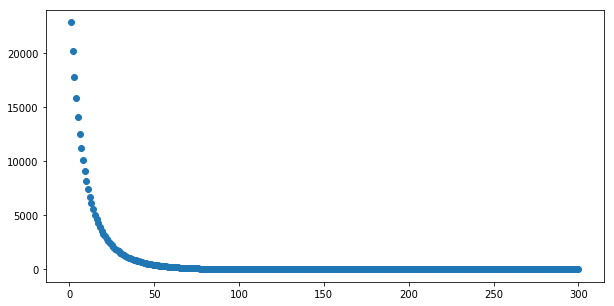

,Iteración k,W_k,Dirección,Norma
0,1,"[[-0.013492926512359582], [-0.0126461702532612...","[[269.85853024719165], [252.9234050652243], [-...",22816.829049
1,2,"[[-0.03368825967479748], [-0.02649060805420246...","[[403.906663248758], [276.88875601882495], [-3...",20127.037922
2,3,"[[-0.05909150727019672], [-0.04097814114527526...","[[508.0649519079848], [289.7506618214558], [-3...",17803.922395
3,4,"[[-0.08845743122382776], [-0.05568226822389038...","[[587.3184790726209], [294.08254157230243], [-...",15793.646952
4,5,"[[-0.12075181589490365], [-0.07028017826489559...","[[645.8876934215177], [291.95820082010397], [-...",14050.494791
5,6,"[[-0.155118917577318], [-0.08453226728237886],...","[[687.3420336482872], [285.0417803496655], [-2...",12535.632608
6,7,"[[-0.19085376215620808], [-0.09826537283321633...","[[714.6968915778016], [274.6621110167493], [-2...",11216.066361
7,8,"[[-0.2273785793182031], [-0.11135907901025482]...","[[730.4963432399006], [261.87412354077], [-202...",10063.757483
8,9,"[[-0.26422276549890933], [-0.12373455487605661...","[[736.8837236141251], [247.50951731603564], [-...",9054.873987
9,10,"[[-0.30100585643936856], [-0.1353454809597742]...","[[735.6618188091845], [232.21852167435145], [-...",8169.155194


In [20]:
T_1, i_1, nor_1, w_1, kdna_1, op_1 = GD(y,w_nulo,x,tol=0.001102,epochs=300,lr=0.00005)
T_1

In [21]:
kdna_1

'GD_LR=5e-05_i=300'

In [22]:
op_1

array([[121212.77854818]])

In [102]:
error_w_1 = mean_squared_error(w_1, beta_true_bias)
error_w_1

1.169772237955481e-14

Norma del Gradiente:  0.0015698269964259594
Forma del gradiente:  (101, 1)


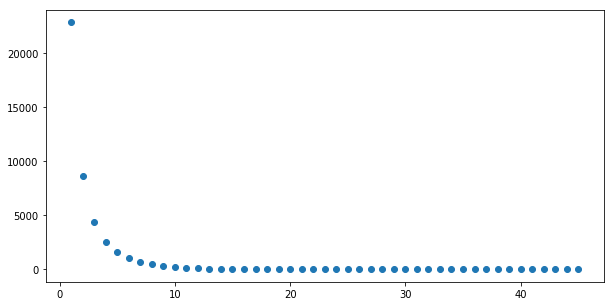

,Iteración k,W_k,Dirección,Norma
0,1,"[[-0.13492926512359582], [-0.12646170253261216...","[[269.85853024719165], [252.9234050652243], [-...",22816.829049
1,2,"[[-0.9400991952550231], [-0.3727501598332273],...","[[1610.3398602628545], [492.57691460123027], [...",8584.342320
2,3,"[[-0.9210175732773046], [-0.1836931143533608],...","[[-38.16324395543694], [-378.11409095973295], ...",4341.023606
3,4,"[[-1.0757336059479936], [-0.2908278581372374],...","[[309.432065341378], [214.26948756775315], [-7...",2507.518897
4,5,"[[-1.0716670794080692], [-0.21433348059032611]...","[[-8.133053079849049], [-152.98875509382253], ...",1566.034584
5,6,"[[-1.1036466976847807], [-0.26240244187208184]...","[[63.95923655342338], [96.13792256351147], [-6...",1024.652624
6,7,"[[-1.1026240232574627], [-0.23107566092185622]...","[[-2.0453488546361314], [-62.65356190045122], ...",689.312395
7,8,"[[-1.109651297217327], [-0.25211244396952465],...","[[14.054547919728662], [42.0735660953369], [-4...",471.632696
8,9,"[[-1.1093054578783408], [-0.23857933917774446]...","[[-0.6916786779721065], [-27.06620958356035], ...",326.162540
9,10,"[[-1.1110330789158156], [-0.2479027187779607],...","[[3.4552420749494104], [18.646759200432456], [...",227.158331


In [23]:
T_2, i_2, nor_2, w_2, kdna_2, op_2 = GD(y,w_nulo,x,tol=0.001102,epochs=45,lr=0.0005)
T_2

In [24]:
kdna_2

'GD_LR=0.0005_i=45'

In [25]:
op_2

array([[121212.78058928]])

Norma del Gradiente:  2620746.6488539837
Forma del gradiente:  (101, 1)


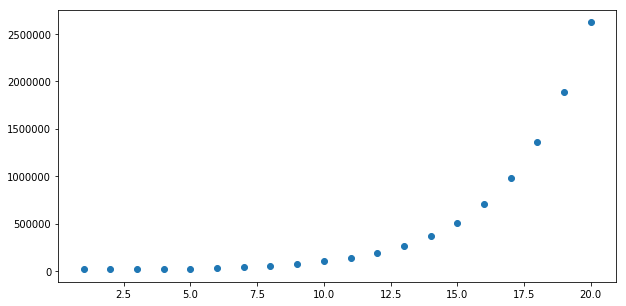

,Iteración k,W_k,Dirección,Norma
0,1,"[[-0.18890097117303414], [-0.17704638354565702...","[[269.85853024719165], [252.9234050652243], [-...",2.281683e+04
1,2,"[[-1.6914736457614177], [-0.5889532064365999],...","[[2146.5323922691196], [588.4383184156326], [1...",1.831862e+04
2,3,"[[-0.40683137999616625], [0.2876722060402137],...","[[-1835.203236807502], [-1252.3220178240194], ...",1.943112e+04
3,4,"[[-1.8094346640646874], [-0.9668008771175292],...","[[2003.7189772407446], [1792.1044045110611], [...",2.238186e+04
4,5,"[[-0.38716075943495487], [0.7201813151338694],...","[[-2031.8198637567607], [-2409.974560359141], ...",2.717622e+04
5,6,"[[-1.8562424030631803], [-1.5150663464577385],...","[[2098.6880623260363], [3193.2109451308684], [...",3.425737e+04
6,7,"[[-0.33800208292483536], [1.4261314800953735],...","[[-2168.9147430547787], [-4201.71118079016], [...",4.435478e+04
7,8,"[[-1.9186876143545797], [-2.440490324869571], ...","[[2258.1221877567777], [5523.7454356642065], [...",5.853088e+04
8,9,"[[-0.26179727782857376], [2.6481384336526252],...","[[-2366.9861950371514], [-7269.4696550317085],...",7.828862e+04
9,10,"[[-2.0145648992234197], [-4.064953664325431], ...","[[2503.95374484978], [9590.13156854008], [-751...",1.057337e+05


In [26]:
T_3, i_3, nor_3, w_3, kdna_3, op_3 = GD(y,w_nulo,x,tol=0.001102,epochs=20,lr=0.0007)
T_3

In [27]:
kdna_3

'GD_LR=0.0007_i=20'

In [28]:
op_3

array([[-2940918.35809997]])

# Tres gráficas en el mismo plano

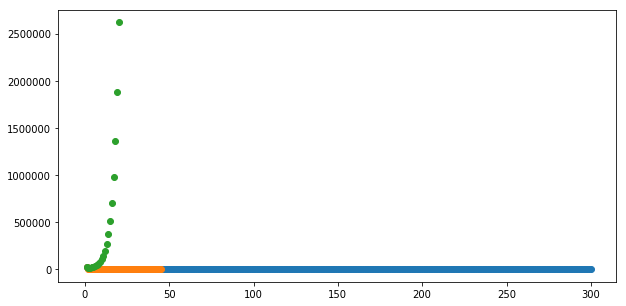

In [29]:
## Gráfica 
fig  = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(i_1,nor_1)
ax1.scatter(i_2,nor_2)
ax1.scatter(i_3,nor_3)
plt.show()

# ¿como el step size afecta la convergencia del GD? 
## Desde la perspectiva de lr, escoger un adecuado learning rate puede ayudar al algoritmo a converger rapido, a no converger o a converger de forma lenta.

## este le afecto de tal forma que requirió de menos iteraciones para llegar al óptimo, alcanzando el error mas bajo en la irteración 34

## sin embargo como se puede observar en la graficas aumentar el lr a 0.0007 provocaba una explosion del grandiente haciendolo tender a valores muy grandes. 


# ¿Con cual step size constante obtuvo el mejor" resultado?
## con el step size = 0.00005

# Parte 3: SGD

In [30]:
batch_size_s = 1
batch_size_s 

1

In [31]:
batches_s = int(x.shape[0] / batch_size_s)
batches_s

1000

In [32]:
def SGD(ye,w,equis,batch_size,tol=0.1,epochs=20,lr=0.1):
    
    unos = np.ones_like(y)
    features = np.hstack((equis,unos))
    
    nor_gradiente = 100
    i = 0 
    
    iteracion_k = []
    w_k = []
    pk = []
    norma_k = []
    
    cur_w = w
    
    batches = int(equis.shape[0] / batch_size) 
    
    while nor_gradiente > tol and i < epochs:
        
        for j in range(batches):
     
            prev_w = cur_w
        
            features_j = features[j].reshape((1, 101))
            ye_j = ye[j].reshape((1, 1)) 
        
            ## Gradiente descendente
            cur_w = cur_w - (lr * (-2 * np.matmul(features_j.T,ye_j) + 2 * np.matmul(np.matmul(features_j.T,features_j),prev_w)))
    
            ## Calculando el valor del grandiente
            gradiente = -2 * np.matmul(features_j.T,ye_j) + 2 * np.matmul(np.matmul(features_j.T,features_j),prev_w)
        
            ## Calculando la norma del gradiente         
            nor_gradiente = np.linalg.norm(gradiente)
        
        i = i+1
            
        iteracion_k.append(i)
        w_k.append(cur_w)
        pk.append(gradiente) 
        norma_k.append(nor_gradiente)

        #print("Iteracion: ", i)
        #print("x_inicial: ", x_inicial)
        #print("gradiente: ", gradiente)
        
    cadena_config = "SGD""_LR="+str(lr)+"_i="+str(i)
    
    optimo = np.matmul(np.matmul(cur_w.T,features.T),ye)
    
    print("Norma del Gradiente: ", nor_gradiente)
    print("Forma del gradiente: ", gradiente.shape)
    
    ## Gráfica 
    fig  = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(1,1,1)
    ax1.scatter(iteracion_k,norma_k)
    plt.show()
        
    
    TableOut = pd.DataFrame({'Iteración k':iteracion_k, 'W_k':w_k, 'Dirección': pk, 'Norma': norma_k})
    return TableOut, iteracion_k, norma_k, cur_w, cadena_config, optimo 
    #print(gradiente.shape)

Norma del Gradiente:  0.0010053212192560606
Forma del gradiente:  (101, 1)


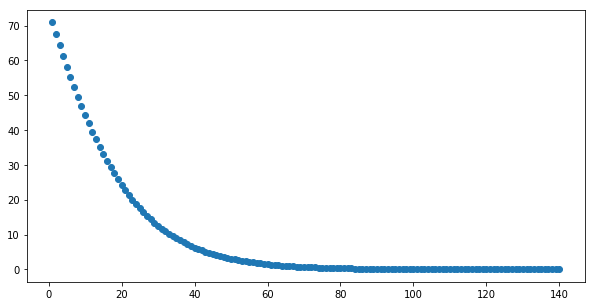

,Iteración k,W_k,Dirección,Norma
0,1,"[[-0.016806536289965552], [-0.0137033079646424...","[[-6.464608630903596], [6.853296702813416], [2...",70.893756
1,2,"[[-0.03898160156982455], [-0.02804255695553034...","[[-6.161107452887042], [6.531547353184171], [2...",67.565428
2,3,"[[-0.0653467879354707], [-0.04263282023851951]...","[[-5.866257291674053], [6.218969167398075], [2...",64.331971
3,4,"[[-0.09491106333850875], [-0.05717682723682673...","[[-5.579962995971348], [5.915461273139148], [2...",61.192341
4,5,"[[-0.126843588473416], [-0.07144875423830552],...","[[-5.302254830788323], [5.621055755116758], [1...",58.146871
5,6,"[[-0.16045034165954003], [-0.08528076376350797...","[[-5.033234159934674], [5.335860071694192], [1...",55.196671
6,7,"[[-0.195154026149727], [-0.09855184635877694],...","[[-4.773033699148474], [5.060014918214676], [1...",52.343198
7,8,"[[-0.2304768063613656], [-0.11117858931401388]...","[[-4.5217891451281], [4.793664150213588], [1.6...",49.587939
8,9,"[[-0.26602548173512164], [-0.12310755648036147...","[[-4.279619615197172], [4.536934047007705], [1...",46.932201
9,10,"[[-0.3014787606282099], [-0.13430901369411946]...","[[-4.046614845499091], [4.2899197401743425], [...",44.376968


In [33]:
T_44, i_44, nor_44, w_44, kdna_44, op_44  = SGD(y,w_nulo,x,1,tol=0.001102,epochs=1000,lr=0.00005)
T_44

In [34]:
kdna_44

'SGD_LR=5e-05_i=140'

In [35]:
op_44

array([[121204.9098838]])

Norma del Gradiente:  0.0007576214330221672
Forma del gradiente:  (101, 1)


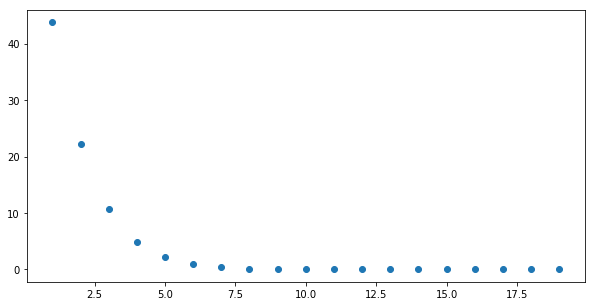

,Iteración k,W_k,Dirección,Norma
0,1,"[[-0.30878399041410565], [-0.16138635563456163...","[[-3.991961747424454], [4.231980595174452], [1...",43.777617
1,2,"[[-0.6275769623060286], [-0.23109413307444898]...","[[-2.032512878919441], [2.1547188092618423], [...",22.289435
2,3,"[[-0.833556890382898], [-0.2500529741667072], ...","[[-0.9746303456806462], [1.0332305195684262], ...",10.688227
3,4,"[[-0.9539609901442275], [-0.2517818162475767],...","[[-0.44818002149684766], [0.47512708641139767]...",4.914940
4,5,"[[-1.0223919829305181], [-0.24954843614553335]...","[[-0.19914504686886847], [0.21111874995243518]...",2.183913
5,6,"[[-1.0610178926605693], [-0.24731249971700356]...","[[-0.08525031775958514], [0.09037603897978208]...",0.934893
6,7,"[[-1.0828168854600029], [-0.24583583083231347]...","[[-0.0346164922608132], [0.036697827481761536]...",0.379620
7,8,"[[-1.0951423792524877], [-0.24501205406259238]...","[[-0.012817667690848467], [0.01358833685670291...",0.140564
8,9,"[[-1.1021280170874272], [-0.24460374439651242]...","[[-0.0038576008151878227], [0.0040895411396020...",0.042304
9,10,"[[-1.106096976390405], [-0.24442579362036515],...","[[-0.00045708457544790804], [0.000484567031461...",0.005013


In [36]:
T_4, i_4, nor_4, w_4, kdna_4, op_4 = SGD(y,w_nulo,x,1,tol=0.001102,epochs=1000,lr=0.0005)
T_4

In [37]:
kdna_4

'SGD_LR=0.0005_i=19'

In [38]:
op_4

array([[121212.44258415]])

Norma del Gradiente:  2.0015477218493933e-05
Forma del gradiente:  (101, 1)


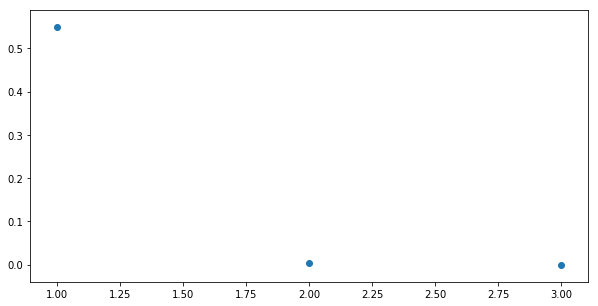

,Iteración k,W_k,Dirección,Norma
0,1,"[[-1.1124976099803665], [-0.25965525245495635]...","[[-0.05008769508525113], [0.05309924469956684]...",0.549284
1,2,"[[-1.1113586601908574], [-0.244499738570597], ...","[[-0.00035321109413910534], [0.000374448101200...",0.003873
2,3,"[[-1.1113899324555854], [-0.24443808734653857]...","[[-1.825156867418798e-06], [1.9348954127806905...",0.000020


In [39]:
T_5, i_5, nor_5, w_5, kdna_5, op_5 = SGD(y,w_nulo,x,1,tol=0.001102,epochs=1000,lr=0.005)
T_5

In [40]:
kdna_5

'SGD_LR=0.005_i=3'

In [41]:
op_5

array([[121212.77615708]])

In [103]:
error_w_5 = mean_squared_error(w_5, beta_true_bias)
error_w_5

1.0195669418559246e-13

Norma del Gradiente:  inf
Forma del gradiente:  (101, 1)


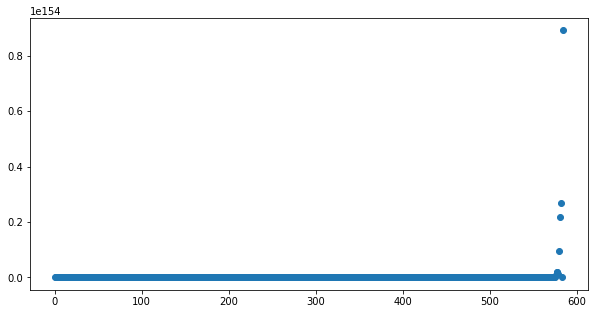

,Iteración k,W_k,Dirección,Norma
0,1,"[[0.4758094889121856], [4.532821798901417], [5...","[[-13.998093628700087], [14.839736539137503], ...",1.535093e+02
1,2,"[[0.08443551700871244], [3.0471704394610524], ...","[[-37.51384625338237], [39.76938644191666], [1...",4.113934e+02
2,3,"[[-4.834579782144156], [5.782359266917238], [-...","[[-1.425343016539248], [1.51104253224704], [0....",1.563094e+01
3,4,"[[-6.405433145228786], [-1.6516300628885767], ...","[[68.24920092574395], [-72.35272084965698], [-...",7.484509e+02
4,5,"[[-13.414943790637974], [-26.730560471915357],...","[[110.1074585366247], [-116.72772871924656], [...",1.207487e+03
5,6,"[[-14.87024074401512], [31.734647610898826], [...","[[-219.4579447178623], [232.65297171298528], [...",2.406673e+03
6,7,"[[-71.40251685188944], [70.35224293300132], [4...","[[-561.8579432485163], [595.63995436741], [209...",6.161583e+03
7,8,"[[-39.71061889620731], [36.2827147321258], [-8...","[[-849.5421165781454], [900.6212933933383], [3...",9.316454e+03
8,9,"[[30.0399190555887], [4.735171039577629], [-99...","[[611.2997976958627], [-648.0545269132527], [-...",6.703784e+03
9,10,"[[158.20020254092262], [147.52488346737846], [...","[[1383.8586944253934], [-1467.0639429474006], ...",1.517601e+04


In [42]:
T_6, i_6, nor_6, w_6, kdna_6, op_6 = SGD(y,w_nulo,x,1,tol=0.001102,epochs=1000,lr=0.01)
T_6

In [43]:
kdna_6

'SGD_LR=0.01_i=1000'

In [94]:
op_6

array([[1.89587853e+264]])

# Tres gráficas en el mismo plano

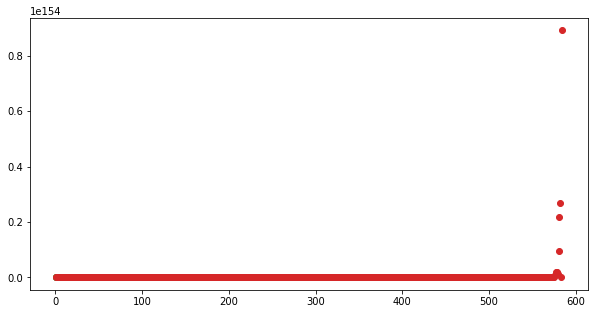

In [90]:
## Gráfica 
fig  = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(i_44,nor_44)
ax1.scatter(i_4,nor_4)
ax1.scatter(i_5,nor_5)
ax1.scatter(i_6,nor_6)
plt.show()

# ¿como el step size afecta la convergencia del GD? 
## Desde la perspectiva de lr, escoger un adecuado learning rate puede ayudar al algoritmo a converger rapido, a no converger o a converger de forma lenta.
## este le afecto de tal forma que requirió de menos iteraciones para llegar al óptimo, alcanzando el erro mas bajo en la irteración 3. 
## Sin embargo como se puede observar en las graficas que al aumentar el tamaño de lr a 0.01 se ocasionaba una explosión del gradiente, es decir valores demasiado grandes conforme aumentaban las iteraciones  

# ¿Con cual step size constante obtuvo el mejor" resultado?
## con el step size = 0.005

# Parte 4: MBGD

In [45]:
batch_size = 32
batch_size 

32

In [46]:
batches = int(x.shape[0] / batch_size)
batches

31

In [47]:
def MBGD(ye,w,equis,batch_size,tol=0.1,epochs=20,lr=0.1):
    
    unos = np.ones_like(y)
    features = np.hstack((equis,unos))
    
    nor_gradiente = 100
    i = 0 
    
    iteracion_k = []
    w_k = []
    pk = []
    norma_k = []
    
    cur_w = w
    
    batches = int(equis.shape[0] / batch_size) 
    
    while nor_gradiente > tol and i < epochs:
        
        for j in range(batches):
     
            prev_w = cur_w
        
            features_j = features[j:j+batch_size]
            ye_j = ye[j:j+batch_size] 
        
            ## Gradiente descendente
            cur_w = cur_w - (lr * (-2 * np.matmul(features_j.T,ye_j) + 2 * np.matmul(np.matmul(features_j.T,features_j),prev_w)))
    
            ## Calculando el valor del grandiente
            gradiente = -2 * np.matmul(features_j.T,ye_j) + 2 * np.matmul(np.matmul(features_j.T,features_j),prev_w)
        
            ## Calculando la norma del gradiente         
            nor_gradiente = np.linalg.norm(gradiente)
        
        i = i+1
            
        iteracion_k.append(i)
        w_k.append(cur_w)
        pk.append(gradiente) 
        norma_k.append(nor_gradiente)

    

        #print("Iteracion: ", i)
        #print("x_inicial: ", x_inicial)
        #print("gradiente: ", gradiente)
            
    cadena_config = "MBGD""_LR="+str(lr)+"_i="+str(i)+"_BatchSize="+str(batch_size)
    
    optimo = np.matmul(np.matmul(cur_w.T,features.T),ye)
    
    print("Norma del Gradiente: ", nor_gradiente)
    print("Forma del gradiente: ", gradiente.shape)
    
    ## Gráfica 
    fig  = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(1,1,1)
    ax1.scatter(iteracion_k,norma_k)
    plt.show()
        
    
    TableOut = pd.DataFrame({'Iteración k':iteracion_k, 'W_k':w_k, 'Dirección': pk, 'Norma': norma_k})
    return TableOut, iteracion_k, norma_k, cur_w, cadena_config, optimo 
    print(gradiente.shape)

# batches de tamaño 25 step sizes: 0.00005, 0.0005, 0.005 y 0.01

Norma del Gradiente:  99.3147181599664
Forma del gradiente:  (101, 1)


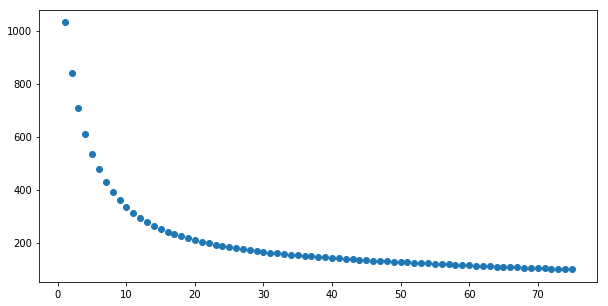

,Iteración k,W_k,Dirección,Norma
0,1,"[[0.06092530459107855], [0.0621807832604724], ...","[[21.89963447646572], [-90.02298656808607], [8...",1030.881865
1,2,"[[0.08708157354259417], [0.11037296142806705],...","[[20.937933016409893], [-76.78323252101042], [...",841.631536
2,3,"[[0.0914601102516354], [0.1463027142939568], [...","[[18.995152263121454], [-65.04224578506094], [...",707.958024
3,4,"[[0.08249905390409344], [0.1721801992066434], ...","[[16.577141749632673], [-55.04779582943085], [...",609.654529
4,5,"[[0.06568551132030777], [0.19014468004631352],...","[[13.986487948896269], [-46.73626514122711], [...",534.923975
5,6,"[[0.04457898158598978], [0.20204791288909904],...","[[11.401652534178327], [-39.91561993095942], [...",476.594280
6,7,"[[0.021472444787837004], [0.2094008106296188],...","[[8.924580556598816], [-34.35748139797553], [8...",430.093491
7,8,"[[-0.0021763494749022674], [0.2133926951876996...","[[6.609811493037817], [-29.84055067970796], [6...",392.371020
8,9,"[[-0.025461142311637396], [0.21493763614589947...","[[4.482554029750027], [-26.168619545890508], [...",361.310924
9,10,"[[-0.04783924596530781], [0.21472619888450148]...","[[2.5500546886374664], [-23.175793918512767], ...",335.399933


In [147]:
T_77, i_77, nor_77, w_77, kdna_77, op_77 = MBGD(y,w_nulo,x,25,tol=0.001102,epochs=75,lr=0.00005)
T_77

In [148]:
kdna_77

'MBGD_LR=5e-05_i=75_BatchSize=25'

In [149]:
op_77

array([[65939.17843613]])

Norma del Gradiente:  4.809960176969655
Forma del gradiente:  (101, 1)


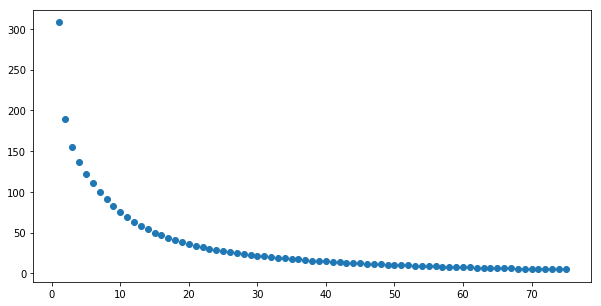

,Iteración k,W_k,Dirección,Norma
0,1,"[[0.010006790352039212], [0.12691005645923015]...","[[10.419037203537465], [-29.668392245551274], ...",308.011472
1,2,"[[-0.20543432442624862], [0.14931372904138834]...","[[-4.018741475197984], [-15.549976729548689], ...",189.734661
2,3,"[[-0.2883586926854445], [0.13210764919922804],...","[[-8.763316775760092], [-10.653118836672931], ...",155.234839
3,4,"[[-0.317222542753356], [0.10447321262605833], ...","[[-9.9527050976229], [-7.847459192015279], [-3...",136.492989
4,5,"[[-0.3227985530452844], [0.07329936221522962],...","[[-9.82835823268799], [-5.979718426580192], [-...",122.369388
5,6,"[[-0.3181997925292128], [0.04178216902208419],...","[[-9.231502665422859], [-4.664926404605282], [...",110.397386
6,7,"[[-0.30927342542470426], [0.011746769096099207...","[[-8.496149757114662], [-3.712011851195001], [...",99.901886
7,8,"[[-0.2986827473402749], [-0.015891380271806577...","[[-7.757971846681716], [-3.008133240027277], [...",90.634407
8,9,"[[-0.2876556619059163], [-0.04080472568627379]...","[[-7.070104082971607], [-2.4808300853560326], ...",82.451988
9,10,"[[-0.2767567936695482], [-0.0630049156987136],...","[[-6.449997427773706], [-2.0812856808460936], ...",75.237054


In [150]:
T_7, i_7, nor_7, w_7, kdna_7, op_7 = MBGD(y,w_nulo,x,25,tol=0.001102,epochs=75,lr=0.0005)
T_7

In [151]:
kdna_7

'MBGD_LR=0.0005_i=75_BatchSize=25'

In [152]:
op_7

array([[72427.5345086]])

Norma del Gradiente:  5.582425512330188e+30
Forma del gradiente:  (101, 1)


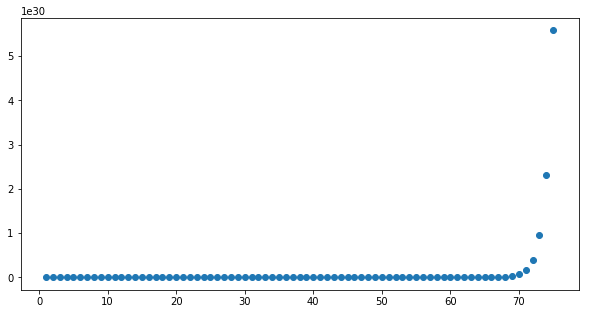

,Iteración k,W_k,Dirección,Norma
0,1,"[[-1.0363943251603922], [-0.5039278280468187],...","[[28.833990737809238], [6.871796203388328], [-...",8.110964e+02
1,2,"[[-1.2542491485654705], [-0.48647097271470546]...","[[16.399676033414266], [29.893163970150624], [...",1.094891e+03
2,3,"[[0.04883607564213065], [-0.63035239640691], [...","[[16.35169124728459], [-64.3112264086943], [95...",1.248414e+03
3,4,"[[-2.3293742057031954], [-0.4447375573225466],...","[[35.77710792590424], [143.78400568554724], [-...",4.169873e+03
4,5,"[[4.113411865325131], [-0.698638910550031], [-...","[[-16.366446042457504], [-368.29006137570696],...",9.329436e+03
5,6,"[[-10.852039320413462], [0.16677553924446986],...","[[99.50340695767039], [863.4004776990702], [-1...",2.290942e+04
6,7,"[[25.696465007166022], [-1.6698290036949999], ...","[[-194.26961155693465], [-2106.9596742276467],...",5.512549e+04
7,8,"[[-62.1515542131728], [2.9671054893041315], [3...","[[499.7447253546447], [5061.8458780589435], [-...",1.329271e+05
8,9,"[[149.9684000956649], [-8.06915851946954], [-8...","[[-1187.8017702356603], [-12227.008596881064],...",3.208399e+05
9,10,"[[-361.62469459664544], [18.645724641389762], ...","[[2872.090772908834], [29483.93982942844], [-6...",7.737213e+05


In [153]:
T_8, i_8, nor_8, w_8, kdna_8, op_8 = MBGD(y,w_nulo,x,25,tol=0.001102,epochs=75,lr=0.005)
T_8

In [154]:
kdna_8

'MBGD_LR=0.005_i=75_BatchSize=25'

In [155]:
op_8

array([[-1.97929183e+31]])

C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in multiply
C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in multiply
C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in matmul
C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in subtract
C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in matmul


Norma del Gradiente:  nan
Forma del gradiente:  (101, 1)


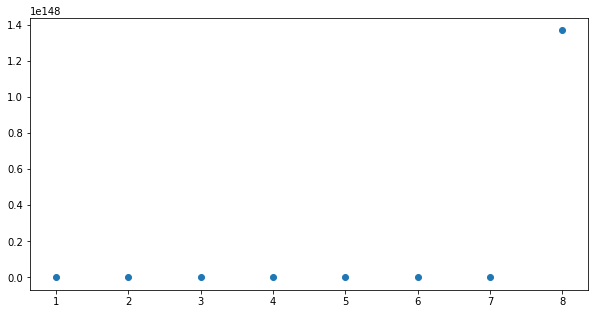

,Iteración k,W_k,Dirección,Norma
0,1,"[[-5.235931924583725e+17], [5.4680138483200154...","[[6.76103844723806e+19], [-7.5032808301712e+19...",6.436468e+20
1,2,"[[-6.0335255618731535e+35], [2.971470509147015...","[[8.147275190124324e+37], [-3.7813287837071254...",7.501679e+38
2,3,"[[5.871257247229013e+53], [-1.588338255906818e...","[[-8.068541758860296e+55], [1.7753739591281907...",1.150630e+57
3,4,"[[-1.072805207094071e+72], [3.507258663042525e...","[[1.4677790157226479e+74], [-4.128048914632432...",1.899047e+75
4,5,"[[1.727437912806608e+90], [-5.497821915854795e...","[[-2.3650387036637583e+92], [6.428432227187243...",3.107753e+93
5,6,"[[-2.839092447139519e+108], [9.077793426137756...","[[3.8865550470856296e+110], [-1.06266337886762...",5.093661e+111
6,7,"[[4.649978116836032e+126], [-1.485643328518454...","[[-6.36567814523895e+128], [1.738786477650129e...",8.346452e+129
7,8,"[[-7.62035759973757e+144], [2.434982023060617e...","[[1.0432002735788454e+147], [-2.84997833159687...",1.367706e+148
8,9,"[[1.2486974074779233e+163], [-3.98995565703709...","[[-1.709423974070813e+165], [4.669942098007641...",inf
9,10,"[[-2.0461912944404068e+181], [6.53820748060258...","[[2.8011655249581833e+183], [-7.65248565216293...",inf


In [156]:
T_9, i_9, nor_9, w_9, kdna_9, op_9 = MBGD(y,w_nulo,x,25,tol=0.001102,epochs=75,lr=0.01)
T_9

In [157]:
kdna_9

'MBGD_LR=0.01_i=17_BatchSize=25'

In [158]:
op_9

array([[nan]])

# batches de tamaño 50 step sizes: 0.00005, 0.0005, 0.005 y 0.01

Norma del Gradiente:  88.14831040330573
Forma del gradiente:  (101, 1)


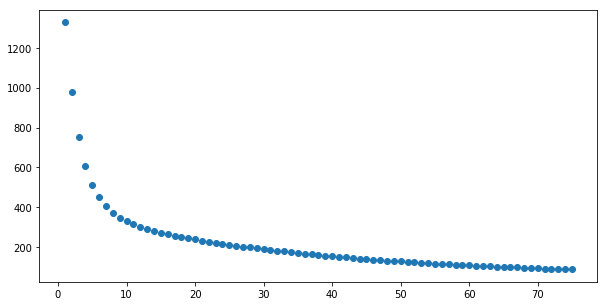

,Iteración k,W_k,Dirección,Norma
0,1,"[[0.05349564465562162], [0.11072496587742697],...","[[-31.91416496459942], [-57.27780761112241], [...",1328.011986
1,2,"[[0.078438007601995], [0.18441490439643882], [...","[[-13.841544324604605], [-31.93678410859542], ...",979.845453
2,3,"[[0.0847687743290947], [0.23201847382865262], ...","[[-3.204080291567365], [-13.665627260574396], ...",755.182824
3,4,"[[0.07930053179351768], [0.26130119258776185],...","[[2.541048611742312], [-0.6597147415598954], [...",609.486036
4,5,"[[0.06667038776659462], [0.27776400512122196],...","[[5.119643655084076], [8.47553905820223], [32....",513.815443
5,6,"[[0.050005140848848995], [0.2853001171321243],...","[[5.699181525082267], [14.795247562820563], [2...",449.558803
6,7,"[[0.031385655169653436], [0.28666268014593155]...","[[5.065039833368935], [19.085368333536508], [2...",404.987959
7,8,"[[0.01217111231904777], [0.2837968725329939], ...","[[3.741033112202203], [21.924444363432073], [2...",372.859572
8,9,"[[-0.006774693224401025], [0.2780753110108535]...","[[2.0721167683761266], [23.73433587786225], [2...",348.744952
9,10,"[[-0.02492561631842451], [0.27046480972799336]...","[[0.28125749417537094], [24.820256315954566], ...",329.926130


In [159]:
T_100, i_100, nor_100, w_100, kdna_100, op_100 = MBGD(y,w_nulo,x,50,tol=0.001102,epochs=75,lr=0.00005)
T_100

In [160]:
kdna_100

'MBGD_LR=5e-05_i=75_BatchSize=50'

In [161]:
op_100

array([[69020.64534976]])

Norma del Gradiente:  1.615825036871071
Forma del gradiente:  (101, 1)


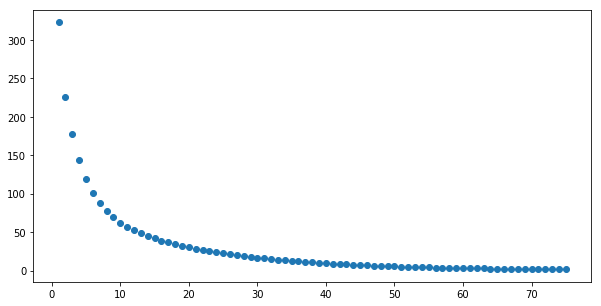

,Iteración k,W_k,Dirección,Norma
0,1,"[[-0.003679596609936161], [0.29612094345119094...","[[7.060979882348192], [29.25138371314901], [19...",322.913971
1,2,"[[-0.13631974560877308], [0.18607387501522346]...","[[-5.389055755074928], [25.628320930755777], [...",226.403937
2,3,"[[-0.18419811444923234], [0.10029279994848372]...","[[-6.350606287824981], [20.96729159201456], [8...",178.320352
3,4,"[[-0.2046657882977636], [0.03381476234460624],...","[[-4.5107743546023045], [17.575311707878456], ...",144.343436
4,5,"[[-0.21576483587121184], [-0.01940242697246267...","[[-2.5696767044408944], [14.936743021639415], ...",119.684927
5,6,"[[-0.22289313197151076], [-0.06242618268173738...","[[-1.0445361955238681], [12.845740226046459], ...",101.555478
6,7,"[[-0.2278705719107622], [-0.09737446594766633]...","[[0.058595848494846337], [11.185386895292595],...",87.952720
7,8,"[[-0.2314196373125115], [-0.12595127673294718]...","[[0.8292527840551003], [9.863979285752052], [0...",77.495977
8,9,"[[-0.23388604930234497], [-0.14954717190896533...","[[1.3560375798428552], [8.805800648766677], [-...",69.254139
9,10,"[[-0.23547095463434892], [-0.1692730402726614]...","[[1.7084485146094082], [7.949857668822887], [-...",62.599565


In [162]:
T_10, i_10, nor_10, w_10, kdna_10, op_10 = MBGD(y,w_nulo,x,50,tol=0.001102,epochs=75,lr=0.0005)
T_10

In [163]:
kdna_10

'MBGD_LR=0.0005_i=75_BatchSize=50'

In [164]:
op_10

array([[75259.08306247]])

In [183]:
error_w_10 = mean_squared_error(w_10, beta_true_bias)
error_w_10

0.5383527792620107

C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in multiply
C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in multiply
C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in subtract
C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in matmul
C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in matmul


Norma del Gradiente:  nan
Forma del gradiente:  (101, 1)


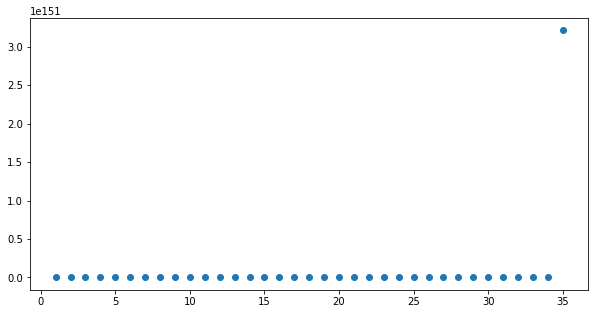

,Iteración k,W_k,Dirección,Norma
0,1,"[[-523.1183706757248], [572.8236733588237], [-...","[[156651.9298839295], [-182804.99976580407], [...",2.790426e+06
1,2,"[[-13678199.299628982], [19763601.39185196], [...","[[4008139928.2118635], [-6362686363.3716], [29...",3.124882e+10
2,3,"[[-261985628207.51556], [389023085325.893], [-...","[[76274196067625.73], [-125206747402602.56], [...",6.013814e+14
3,4,"[[-4920603917277912.0], [7332685304792486.0], ...","[[1.4312674874801792e+18], [-2.359900961164365...",1.133079e+19
4,5,"[[-9.221650231378374e+19], [1.3748460931128558...","[[2.6820007006506578e+22], [-4.424680461227902...",2.124444e+23
5,6,"[[-1.7277426912028224e+24], [2.576027497029698...","[[5.024843561426057e+26], [-8.290446974085847e...",3.980533e+27
6,7,"[[-3.236935550345066e+28], [4.826239219246024e...","[[9.414053426976762e+30], [-1.5532317057471703...",7.457607e+31
7,8,"[[-6.0643889252086226e+32], [9.041953576694627...","[[1.7637195917374417e+35], [-2.909977755963442...",1.397182e+36
8,9,"[[-1.1361607490944804e+37], [1.694006470562751...","[[3.304321226340365e+39], [-5.45183194838465e+...",2.617615e+40
9,10,"[[-2.128592286151937e+41], [3.1737139037732797...","[[6.190631605886125e+43], [-1.0213983920419498...",4.904090e+44


In [165]:
T_11, i_11, nor_11, w_11, kdna_11, op_11 = MBGD(y,w_nulo,x,50,tol=0.001102,epochs=75,lr=0.005)
T_11

In [166]:
kdna_11

'MBGD_LR=0.005_i=72_BatchSize=50'

In [167]:
op_11

array([[nan]])

C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in multiply
C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in multiply
C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in matmul
C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in matmul


Norma del Gradiente:  nan
Forma del gradiente:  (101, 1)


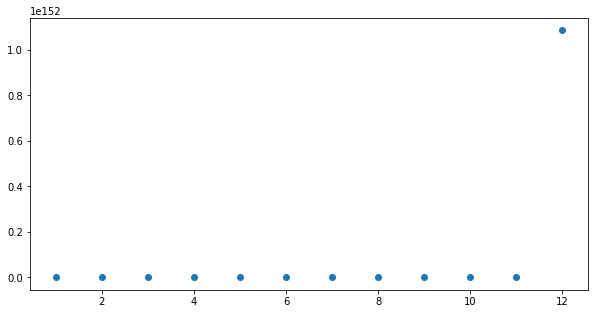

,Iteración k,W_k,Dirección,Norma
0,1,"[[-13016575807.039618], [-12829157877.865685],...","[[1502696831873.6946], [1767095702903.684], [1...",2.736279e+14
1,2,"[[-2.1071889509464236e+23], [2.810756553838410...","[[2.5140701358917404e+25], [-3.476669485844975...",2.694471e+26
2,3,"[[-8.281323260739492e+35], [1.2250497814413421...","[[9.767956339919296e+37], [-1.5170517890237642...",7.557598e+38
3,4,"[[-3.107196623118834e+48], [4.6972470786395255...","[[3.6540192300437727e+50], [-5.817571630596507...",2.837633e+51
4,5,"[[-1.1617229614333608e+61], [1.764184170746967...","[[1.3652800072825245e+63], [-2.184997189295871...",1.065099e+64
5,6,"[[-4.3417633180981744e+73], [6.599503535590386...","[[5.10183879728253e+75], [-8.173722657958735e+...",3.984439e+76
6,7,"[[-1.622568915428399e+86], [2.4667812604716651...","[[1.9065656737446186e+88], [-3.055199737050600...",1.489331e+89
7,8,"[[-6.063665139816154e+98], [9.218907695778244e...","[[7.124942933297562e+100], [-1.141795960394056...",5.565972e+101
8,9,"[[-2.2660332959162678e+111], [3.44519616480996...","[[2.6626370535223247e+113], [-4.26700355281709...",2.080059e+114
9,10,"[[-8.468318149729577e+123], [1.287494931310321...","[[9.950450635298118e+125], [-1.594610355674593...",7.773334e+126


In [168]:
T_12, i_12, nor_12, w_12, kdna_12, op_12 = MBGD(y,w_nulo,x,50,tol=0.001102,epochs=75,lr=0.01)
T_12

In [169]:
kdna_12

'MBGD_LR=0.01_i=25_BatchSize=50'

In [170]:
op_12

array([[nan]])

# batches de tamaño 100 step sizes: 0.00005, 0.0005, 0.005 y 0.01

Norma del Gradiente:  91.36205644433991
Forma del gradiente:  (101, 1)


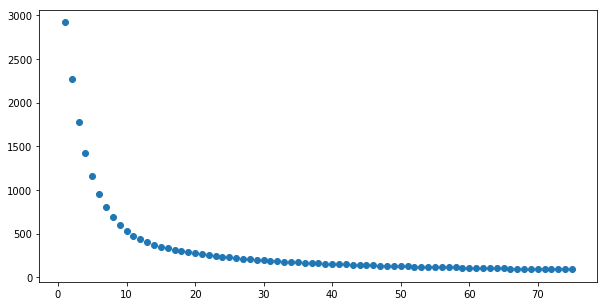

,Iteración k,W_k,Dirección,Norma
0,1,"[[0.07952514616864426], [0.0741569093975636], ...","[[-131.61641640674873], [-110.9438885428779], ...",2920.447914
1,2,"[[0.12269379470498297], [0.1191241700576639], ...","[[-66.71253084475111], [-64.07149023111464], [...",2268.292628
2,3,"[[0.14008351477180697], [0.14421975879336577],...","[[-20.531960285016453], [-32.43150592018907], ...",1784.791684
3,4,"[[0.13931161583921983], [0.15600029853649094],...","[[12.103760097562002], [-11.478646652367274], ...",1424.998916
4,5,"[[0.12586284049455568], [0.15905032621518114],...","[[34.94189818565255], [2.0285115198444714], [-...",1156.287585
5,6,"[[0.10368495738142308], [0.15655023868068838],...","[[50.695431118679465], [10.394145148928999], [...",954.830505
6,7,"[[0.07561749276041563], [0.15068430199241406],...","[[61.32955906427881], [15.249840086185543], [-...",803.113686
7,8,"[[0.043700476708980134], [0.14293320234512305]...","[[68.26859000327514], [17.745456811335515], [-...",688.188881
8,9,"[[0.009396888465238982], [0.1342833425796489],...","[[72.54537696675877], [18.68662689425443], [-7...",600.448792
9,10,"[[-0.026246990880500563], [0.1253761828117456]...","[[74.90930187048681], [18.63367861876924], [-7...",532.763378


In [171]:
T_133, i_133, nor_133, w_133, kdna_133, op_133 = MBGD(y,w_nulo,x,100,tol=0.001102,epochs=75,lr=0.00005)
T_133

In [172]:
kdna_133

'MBGD_LR=5e-05_i=75_BatchSize=100'

In [173]:
op_133

array([[101057.99532981]])

Norma del Gradiente:  12.342455548012436
Forma del gradiente:  (101, 1)


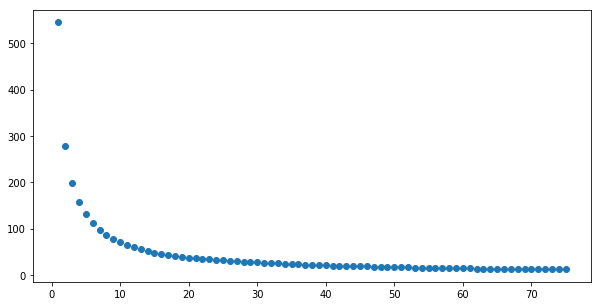

,Iteración k,W_k,Dirección,Norma
0,1,"[[-0.04218125579154088], [0.11341711701273659]...","[[75.40642509809769], [20.084122952392192], [-...",545.202516
1,2,"[[-0.38918165426408446], [0.045639918522604454...","[[61.55402692163986], [5.407493274061636], [-4...",277.784987
2,3,"[[-0.6358838073131583], [0.01703140285119692],...","[[44.27337813981825], [1.8645735673460706], [-...",199.144880
3,4,"[[-0.8085847029210184], [-0.005622400369301772...","[[32.32506658976288], [1.5502394496878082], [-...",157.409245
4,5,"[[-0.9317543238702656], [-0.02816859886553195]...","[[24.19411248254815], [1.6462609171842644], [-...",130.838358
5,6,"[[-1.021627062446641], [-0.050796306593502316]...","[[18.604613199323694], [1.6722203283131591], [...",112.108601
6,7,"[[-1.0888440538150228], [-0.0730211066258566],...","[[14.701940454377905], [1.5866812902731056], [...",98.039483
7,8,"[[-1.1404232184898246], [-0.09443849806449087]...","[[11.926028292487587], [1.4169577806698612], [...",87.032302
8,9,"[[-1.181035522529307], [-0.11478376497527647],...","[[9.909786625273426], [1.1938004904758088], [-...",78.184386
9,10,"[[-1.21382144444385], [-0.13390223428613754], ...","[[8.4110803860506], [0.9415049252260985], [-16...",70.935782


In [174]:
T_13, i_13, nor_13, w_13, kdna_13, op_13 = MBGD(y,w_nulo,x,100,tol=0.001102,epochs=75,lr=0.0005)
T_13

In [175]:
kdna_13

'MBGD_LR=0.0005_i=75_BatchSize=100'

In [176]:
op_13

array([[115799.40905764]])

Norma del Gradiente:  nan
Forma del gradiente:  (101, 1)


C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in multiply
C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in multiply
C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in matmul
C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in subtract
C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in matmul


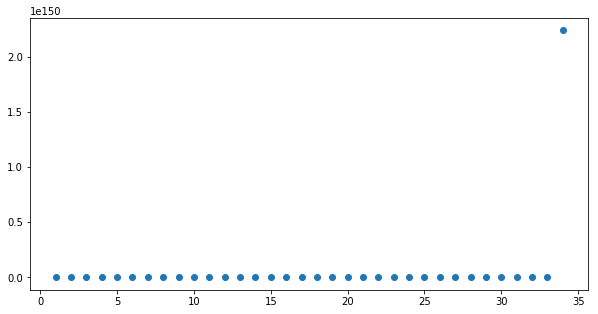

,Iteración k,W_k,Dirección,Norma
0,1,"[[-1411.9299657066763], [-1177.3063129841694],...","[[409810.89063768514], [350540.2025784901], [5...",6.932352e+06
1,2,"[[7364934.325451769], [5955177.574436315], [-2...","[[-1965965746.6094675], [-1548055816.932745], ...",1.079737e+11
2,3,"[[385240620980.24805], [261179151735.86136], [...","[[-105676157895718.02], [-71260922365621.19], ...",2.254385e+15
3,4,"[[1.0206092895353344e+16], [6481993817414203.0...","[[-2.7987834666232515e+18], [-1.77241918804052...",5.020987e+19
4,5,"[[2.4303747295520224e+20], [1.4950844865595395...","[[-6.657751420618677e+22], [-4.085996129763009...",1.133350e+24
5,6,"[[5.612609907193697e+24], [3.39953792887281e+2...","[[-1.5365145297050296e+27], [-9.28587321928105...",2.565258e+28
6,7,"[[1.2817961215622392e+29], [7.706365335783435e...","[[-3.507876748144894e+31], [-2.104355180450251...",5.809325e+32
7,8,"[[2.913908516216393e+33], [1.745734544299775e+...","[[-7.97314513592305e+35], [-4.7662801433893946...",1.315693e+37
8,9,"[[6.610746935145869e+37], [3.953955798996792e+...","[[-1.8087146616592396e+40], [-1.07944380022749...",2.979773e+41
9,10,"[[1.4983806113006777e+42], [8.954967329868595e...","[[-4.0994488007621615e+44], [-2.44464849869575...",6.748517e+45


In [177]:
T_14, i_14, nor_14, w_14, kdna_14, op_14 = MBGD(y,w_nulo,x,100,tol=0.001102,epochs=75,lr=0.005)
T_14

In [178]:
kdna_14

'MBGD_LR=0.005_i=71_BatchSize=100'

In [179]:
op_14

array([[nan]])

Norma del Gradiente:  nan
Forma del gradiente:  (101, 1)


C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in matmul
C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in multiply
C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in matmul
C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in multiply
C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in matmul
C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in matmul


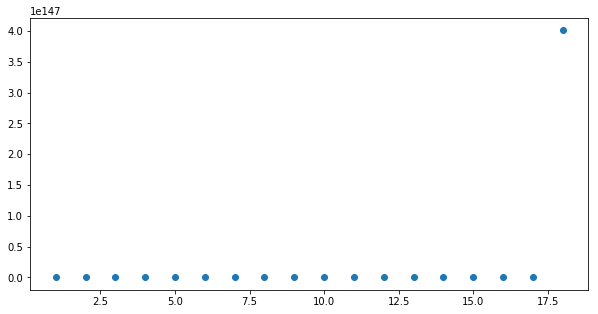

,Iteración k,W_k,Dirección,Norma
0,1,"[[-11271579.490612034], [-9926059.76656903], [...","[[1336123313.4171007], [1184838700.5725052], [...",1.777818e+10
1,2,"[[-3542673323153.2363], [20431727478337.58], [...","[[1342521736995260.8], [-1615512224721556.8], ...",1.432302e+18
2,3,"[[5.0183405064502175e+22], [3.635887287551734e...","[[-5.773791875903622e+24], [-4.194283306189168...",1.568458e+26
3,4,"[[8.368580087162174e+30], [5.558240532722801e+...","[[-9.66582414964122e+32], [-6.4308447484624114...",1.886740e+34
4,5,"[[1.142484634102264e+39], [7.252191937133581e+...","[[-1.3203751276672142e+41], [-8.39047124823711...",2.327851e+42
5,6,"[[1.4756983036285828e+47], [9.137220968513346e...","[[-1.70561043682516e+49], [-1.05679324067208e+...",2.891615e+50
6,7,"[[1.8680515281819246e+55], [1.1410842288658075...","[[-2.159068005083656e+57], [-1.319423374221119...",3.598336e+58
7,8,"[[2.3446246651386136e+63], [1.4217730835381527...","[[-2.7098314746678516e+65], [-1.64372570651359...",4.479795e+66
8,9,"[[2.9311095089384237e+71], [1.7704911390185357...","[[-3.387621751882313e+73], [-2.046701598960056...",5.577736e+74
9,10,"[[3.657123560266064e+79], [2.20444597792025e+7...","[[-4.226675042650701e+81], [-2.548233686680554...",6.944867e+82


In [180]:
T_15, i_15, nor_15, w_15, kdna_15, op_15 = MBGD(y,w_nulo,x,100,tol=0.001102,epochs=75,lr=0.01)
T_15

In [181]:
kdna_15

'MBGD_LR=0.01_i=39_BatchSize=100'

In [182]:
op_15

array([[nan]])

# ¿Como el tamaño del batch afecta la convergencia de este algoritmo?
## En este ejercicio se logra observar como al aumentar el batch la convergencia se vuelve un poco más lenta, podemos decir que si el tamaño del batch tiende al tamaño del dataset completo (GD), entoces se deberán calcula la suma de todos los gradientes de todas las observaciones al mimso tiempo.

## Es por eso que al aumentar el tamaño del batch de 25 en 25 el algoritmo debe agregar a la suma en el error esos 25 elementos adicionales, lo cual lo va haciendo mas lento. 

## Sin embargo es mejor definir el tamaño del batch, que pasar por todo el dataset completo. En ese sentido MBGD comparado con GD ayuda a que los calculos sean más rápidos y que por lo tanto se puede converger más rápido. 

# ¿Con cual combinación de batch size y step size obtuvo el mejor resultado?
## Con un batch de tamaño 50 y con un lr igual a 0.0005 

# Parte 5: Comparación

In [212]:
lugar = ["Primero","Segundo","Tercero"]

In [213]:
f_optimo = [op_5,op_10,op_1]
#f_optimo

In [214]:
model_name = [kdna_5,kdna_10,kdna_1]
#model_name

In [215]:
norma_general = [nor_5[-1],nor_10[-1],nor_1[-1]]

In [216]:
w_obtneido = [w_5,w_10,w_1]
#w_obtneido
#w_1.shape

In [217]:
w_real = [beta_true_bias,beta_true_bias,beta_true_bias]
#beta_true_bias.shape

In [218]:
error_w_general = [error_w_5,error_w_10,error_w_1]

In [219]:
Tabla_Resumen = pd.DataFrame(data = {'Ranking':lugar,'Modelo':model_name, 'Norma Gradiente':norma_general, 'f óptimo':f_optimo, 'W Obtneido':w_obtneido, 'W Real':w_real, 
                                     'W Obtneido versus W Real':error_w_general}) #
Tabla_Resumen

,Ranking,Modelo,Norma Gradiente,f óptimo,W Obtneido,W Real,W Obtneido versus W Real
0,Primero,SGD_LR=0.005_i=3,0.000020,[[121212.77615707676]],"[[-1.1113899324555854], [-0.24443808734653857]...","[[-1.1113895108006178], [-0.24443776567711809]...",1.019567e-13
1,Segundo,MBGD_LR=0.0005_i=75_BatchSize=50,1.615825,[[75259.08306246718]],"[[-0.15311440478871124], [-0.3895884191471427]...","[[-1.1113895108006178], [-0.24443776567711809]...",5.383528e-01
2,Tercero,GD_LR=5e-05_i=300,0.001078,[[121212.77854817777]],"[[-1.1113893452153998], [-0.24443767571342948]...","[[-1.1113895108006178], [-0.24443776567711809]...",1.169772e-14


# Como se puede observar en la tabla, el primer lugar es para el SGD el cual alcanza una norma de gradiente de 0.000020 (el mas bajo de los tres) en la tercera iteración con un lr igual a 0.005, en un valor óptimo en f de 121212.77615707676, luego de calular el MSE para el vector w (el cual inlcuye el bias) se obtubo un error bajo de 1.019567e-13

# Por otra parte el segundo lugar es para el MBGD el cual alcanza una norma de gradiente de 1.615825, en la iteración numero 50 con un lr igual a 0.0005, y un valor óptimo en f de 75259.08306246718 (el cual difiere bastante al de SGD), luego de calcular el MSE para el vector w se obtuvo un error de 5.383528e-01

# Y por último el tercer lugar es para el GD el cual alcanza una norma de gradiente de 0.001078, en la iteración numero 300 con un lr igual a 0.00005, y un valor óptimo en f de 121212.77854817777 (el cual se parece bastante al de SGD), luego de calcular el MSE para el vector w se obtuvo un error de 1.169772e-14. Se decidió dejar al GD en tercer lugar ya que requirio de muchas iteranciones para llegar al valor del gradiente establecido. 